# LDA: Latent Dirichlet Analysis using gensim library

For Topic modelling

Replicating example from 
https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

N.b. see gensim LDA documentation at:
https://radimrehurek.com/gensim/models/ldamodel.html



In [104]:
# Imports

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

import numpy as np

# Importing Gensim
import gensim
from gensim import corpora

In [105]:
# Sample data

doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [106]:
# Remove puncuation, stopwords and normalise corpus

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]  

doc_clean

[['sugar', 'bad', 'consume', 'sister', 'like', 'sugar', 'father'],
 ['father',
  'spends',
  'lot',
  'time',
  'driving',
  'sister',
  'around',
  'dance',
  'practice'],
 ['doctor',
  'suggest',
  'driving',
  'may',
  'cause',
  'increased',
  'stress',
  'blood',
  'pressure'],
 ['sometimes',
  'feel',
  'pressure',
  'perform',
  'well',
  'school',
  'father',
  'never',
  'seems',
  'drive',
  'sister',
  'better'],
 ['health', 'expert', 'say', 'sugar', 'good', 'lifestyle']]

In [107]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

doc_term_matrix

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(35 unique tokens: ['sugar', 'bad', 'consume', 'sister', 'like']...) from 5 documents (total 43 corpus positions)


[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(3, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(9, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(3, 1),
  (5, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)]]

In [108]:
# Fix random seed before running LDA model, so that get same results every time
# (as model uses random seed, so volatile with small data sample):
np.random.seed(0)

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.3333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.02857142857142857
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online LDA training, 3 topics, 50 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-5.230 per-word bound, 37.5 perplexity estimate based on a held-out corpus of 5 documents with 43 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #5/5
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.101*"sugar" + 0.043*"father" + 0.043*"consume" + 0.043*"sister" + 0.042*"like" + 0.042*"bad" + 0.040*"suggest" + 0.040*"driving" + 0.040*"pressure" + 0.040*"increased"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.054*"pressure" + 0.051*"sister" + 0.051*"father" + 0.050*"never" + 0.050*"feel"

In [109]:
# Results
# N.b. print_topics is an Alias for show_topics() that prints the num_words most probable words for topics number of topics.
# Set topics=-1 to print all topics.

## Interpretation is that one topic is about bad health, another is about family?

ldamodel.print_topics(num_topics=-1, num_words=3)

INFO:gensim.models.ldamodel:topic #0 (0.333): 0.099*"sugar" + 0.040*"suggest" + 0.040*"increased"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.057*"sister" + 0.057*"father" + 0.056*"pressure"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.065*"sister" + 0.065*"father" + 0.065*"driving"


[(0, '0.099*"sugar" + 0.040*"suggest" + 0.040*"increased"'),
 (1, '0.057*"sister" + 0.057*"father" + 0.056*"pressure"'),
 (2, '0.065*"sister" + 0.065*"father" + 0.065*"driving"')]

In [110]:
# Return a list of (word, probability) 2-tuples for the most probable words in topic topicid.
# Only return 2-tuples for the topn most probable words (ignore the rest).

ldamodel.show_topic(2, topn=10)

[('sister', 0.064929398125238028),
 ('father', 0.064929397227536836),
 ('driving', 0.064675617004669159),
 ('practice', 0.064380690971672927),
 ('dance', 0.064380690679738672),
 ('spends', 0.064380690505008914),
 ('time', 0.064380690384083783),
 ('lot', 0.064380690059082327),
 ('around', 0.064380689647605321),
 ('bad', 0.016134222875724101)]

In [111]:
# For num_topics number of topics, return num_words most significant words (10 words per topic, by default).

ldamodel.show_topics(num_topics=3, num_words=3, log=False, formatted=True)

[(0, '0.099*"sugar" + 0.040*"suggest" + 0.040*"increased"'),
 (1, '0.057*"sister" + 0.057*"father" + 0.056*"pressure"'),
 (2, '0.065*"sister" + 0.065*"father" + 0.065*"driving"')]

### For implementation:

1) Only keep words that are above a certain probability value, and/or are within say 0.5 * the maximum word probability (to keep only significant words in a topic, rather than top n for every topic)

2) Only keep topics where there is a significant word - i.e. the highest probbailuty word is above a specific value (e.g. 3 * (1/number of words); as 1/number of words is the random probability of a word).

# Example using LDA library

Following example from http://chrisstrelioff.ws/sandbox/2014/11/13/getting_started_with_latent_dirichlet_allocation_in_python.html
but with simple dataset from above


In [112]:
# Imports

from __future__ import division, print_function

import numpy as np
import lda

In [113]:
# Check types of objects created in gensim example match those LDA expects

# type(doc_term_matrix)

doc_term_matrix

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(3, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(9, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(3, 1),
  (5, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)]]

In [114]:
# Convert gensim example term freq matrix to numpy.ndarray

# dt_array = np.ndarray([[],[]])
dt_array = np.zeros(shape=(5,35), dtype=int)

# doc_term_matrix_np = np.asarray(doc_term_matrix)

rownum = 0

for row in doc_term_matrix:
    for tup in row:
        dt_array[rownum, tup[0]] = tup[1]
    rownum += 1
    
dt_array

array([[2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

In [115]:
# Fit model - n.b. random_state parameter controls random seed or not

model = lda.LDA(n_topics=3, n_iter=500, random_state=0)
model.fit(dt_array)

INFO:lda:n_documents: 5
INFO:lda:vocab_size: 35
INFO:lda:n_words: 43
INFO:lda:n_topics: 3
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -315
INFO:lda:<10> log likelihood: -265
INFO:lda:<20> log likelihood: -280
INFO:lda:<30> log likelihood: -263
INFO:lda:<40> log likelihood: -266
INFO:lda:<50> log likelihood: -261
INFO:lda:<60> log likelihood: -272
INFO:lda:<70> log likelihood: -269
INFO:lda:<80> log likelihood: -276
INFO:lda:<90> log likelihood: -271
INFO:lda:<100> log likelihood: -266
INFO:lda:<110> log likelihood: -271
INFO:lda:<120> log likelihood: -261
INFO:lda:<130> log likelihood: -271
INFO:lda:<140> log likelihood: -266
INFO:lda:<150> log likelihood: -260
INFO:lda:<160> log likelihood: -269
INFO:lda:<170> log likelihood: -259
INFO:lda:<180> log likelihood: -256
INFO:lda:<190> log likelihood: -275
INFO:lda:<200> log likelihood: -263
INFO:lda:<210> log likelihood: -265
INFO:lda:<220> log likelihood: -276
INFO:lda:<230> log likelihood: -270
INFO:lda:<240> log likelihood: -275


In [116]:
# Look at the topic-word probabilities

topic_word = model.topic_word_
print("type(topic_word): {}".format(type(topic_word)))
print("shape: {}".format(topic_word.shape))

type(topic_word): <class 'numpy.ndarray'>
shape: (3, 35)


In [117]:
# Check probabilities of the words are normalized

for n in range(3):
    sum_pr = sum(topic_word[n,:])
    print("topic: {} sum: {}".format(n, sum_pr))

topic: 0 sum: 0.9999999999999998
topic: 1 sum: 1.0000000000000002
topic: 2 sum: 1.0000000000000004


In [118]:
# Convert dictioary from example above, into tuple that LDA example is expecting

vocab = tuple(dictionary.values())

In [119]:
# Get the top 5 words for each topic (by probability) - N.B. DOESN'R UN BECAUSE VOCAB IS NOT IN SAME FORMAT!!!

n = 5
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))

*Topic 0
- lifestyle drive good perform school
*Topic 1
- driving pressure feel suggest may
*Topic 2
- sister father sugar well practice


# LDA library example - using Reuters data

Uses Reuters data,as in example at:

http://chrisstrelioff.ws/sandbox/2014/11/13/getting_started_with_latent_dirichlet_allocation_in_python.html

In [120]:
# Import data from the LDA package

# document-term matrix
X = lda.datasets.load_reuters()
print("type(X): {}".format(type(X)))
print("shape: {}\n".format(X.shape))

# the vocab
vocab = lda.datasets.load_reuters_vocab()
print("type(vocab): {}".format(type(vocab)))
print("len(vocab): {}\n".format(len(vocab)))

# titles for each story
titles = lda.datasets.load_reuters_titles()
print("type(titles): {}".format(type(titles)))
print("len(titles): {}\n".format(len(titles)))

type(X): <class 'numpy.ndarray'>
shape: (395, 4258)

type(vocab): <class 'tuple'>
len(vocab): 4258

type(titles): <class 'tuple'>
len(titles): 395



In [121]:
# Call back some records from the data

doc_id = 0
word_id = 3117

print("doc id: {} word id: {}".format(doc_id, word_id))
print("-- count: {}".format(X[doc_id, word_id]))
print("-- word : {}".format(vocab[word_id]))
print("-- doc  : {}".format(titles[doc_id]))

doc id: 0 word id: 3117
-- count: 2
-- word : heir-to-the-throne
-- doc  : 0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20


In [122]:
# Fit the model

model = lda.LDA(n_topics=20, n_iter=500, random_state=1)
model.fit(X)

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -719800
INFO:lda:<20> log likelihood: -699115
INFO:lda:<30> log likelihood: -689370
INFO:lda:<40> log likelihood: -684918
INFO:lda:<50> log likelihood: -681322
INFO:lda:<60> log likelihood: -678979
INFO:lda:<70> log likelihood: -676598
INFO:lda:<80> log likelihood: -675383
INFO:lda:<90> log likelihood: -673316
INFO:lda:<100> log likelihood: -672761
INFO:lda:<110> log likelihood: -671320
INFO:lda:<120> log likelihood: -669744
INFO:lda:<130> log likelihood: -669292
INFO:lda:<140> log likelihood: -667940
INFO:lda:<150> log likelihood: -668038
INFO:lda:<160> log likelihood: -667429
INFO:lda:<170> log likelihood: -666475
INFO:lda:<180> log likelihood: -665562
INFO:lda:<190> log likelihood: -664920
INFO:lda:<200> log likelihood: -664979
INFO:lda:<210> log likelihood: -664722
INFO:lda:<220> log likelihood: -6

In [123]:
# From the fit model we can look at the topic-word probabilities:

topic_word = model.topic_word_
print("type(topic_word): {}".format(type(topic_word)))
print("shape: {}".format(topic_word.shape))

type(topic_word): <class 'numpy.ndarray'>
shape: (20, 4258)


In [124]:
# Check probabilities are normalises

for n in range(len(topic_word)):
    sum_pr = sum(topic_word[n,:])
    print("topic: {} sum: {}".format(n, sum_pr))

topic: 0 sum: 1.0000000000000875
topic: 1 sum: 1.0000000000001148
topic: 2 sum: 0.9999999999998656
topic: 3 sum: 1.0000000000000042
topic: 4 sum: 1.0000000000000928
topic: 5 sum: 0.9999999999999372
topic: 6 sum: 0.9999999999999049
topic: 7 sum: 1.0000000000001694
topic: 8 sum: 1.0000000000000906
topic: 9 sum: 0.9999999999999195
topic: 10 sum: 1.0000000000001261
topic: 11 sum: 0.9999999999998876
topic: 12 sum: 1.0000000000001268
topic: 13 sum: 0.9999999999999034
topic: 14 sum: 1.0000000000001892
topic: 15 sum: 1.0000000000000984
topic: 16 sum: 1.0000000000000768
topic: 17 sum: 0.9999999999999146
topic: 18 sum: 1.0000000000000364
topic: 19 sum: 1.0000000000001434


In [125]:
# Get the top 5 words for each topic

n = 5
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))
    

*Topic 0
- government british minister west group
*Topic 1
- church first during people political
*Topic 2
- elvis king wright fans presley
*Topic 3
- yeltsin russian russia president kremlin
*Topic 4
- pope vatican paul surgery pontiff
*Topic 5
- family police miami versace cunanan
*Topic 6
- south simpson born york white
*Topic 7
- order church mother successor since
*Topic 8
- charles prince diana royal queen
*Topic 9
- film france french against actor
*Topic 10
- germany german war nazi christian
*Topic 11
- east prize peace timor quebec
*Topic 12
- n't told life people church
*Topic 13
- years world time year last
*Topic 14
- mother teresa heart charity calcutta
*Topic 15
- city salonika exhibition buddhist byzantine
*Topic 16
- music first people tour including
*Topic 17
- church catholic bernardin cardinal bishop
*Topic 18
- harriman clinton u.s churchill paris
*Topic 19
- century art million museum city


In [127]:
#Document-Topic

doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))

type(doc_topic): <class 'numpy.ndarray'>
shape: (395, 20)


In [128]:
# Check probabilities are normalised, for first 10 documents

for n in range(10):
    sum_pr = sum(doc_topic[n,:])
    print("document: {} sum: {}".format(n, sum_pr))

document: 0 sum: 1.0000000000000002
document: 1 sum: 0.9999999999999998
document: 2 sum: 1.0
document: 3 sum: 1.0000000000000002
document: 4 sum: 0.9999999999999997
document: 5 sum: 1.0
document: 6 sum: 0.9999999999999999
document: 7 sum: 0.9999999999999994
document: 8 sum: 1.0
document: 9 sum: 0.9999999999999993


In [129]:
# Using the title of the new stories, we can sample the most probable topic:

for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n{}...".format(n,
                                            topic_most_pr,
                                            titles[n][:50]))

doc: 0 topic: 8
0 UK: Prince Charles spearheads British royal revo...
doc: 1 topic: 1
1 GERMANY: Historic Dresden church rising from WW2...
doc: 2 topic: 14
2 INDIA: Mother Teresa's condition said still unst...
doc: 3 topic: 8
3 UK: Palace warns British weekly over Charles pic...
doc: 4 topic: 14
4 INDIA: Mother Teresa, slightly stronger, blesses...
doc: 5 topic: 14
5 INDIA: Mother Teresa's condition unchanged, thou...
doc: 6 topic: 14
6 INDIA: Mother Teresa shows signs of strength, bl...
doc: 7 topic: 14
7 INDIA: Mother Teresa's condition improves, many ...
doc: 8 topic: 14
8 INDIA: Mother Teresa improves, nuns pray for "mi...
doc: 9 topic: 8
9 UK: Charles under fire over prospect of Queen Ca...


In [130]:
### Visualizing the inference - imports

# Import matplotlib and set a style:

import matplotlib.pyplot as plt

# use matplotlib style sheet
try:
    plt.style.use('ggplot')
except:
    # version of matplotlib might not be recent
    pass

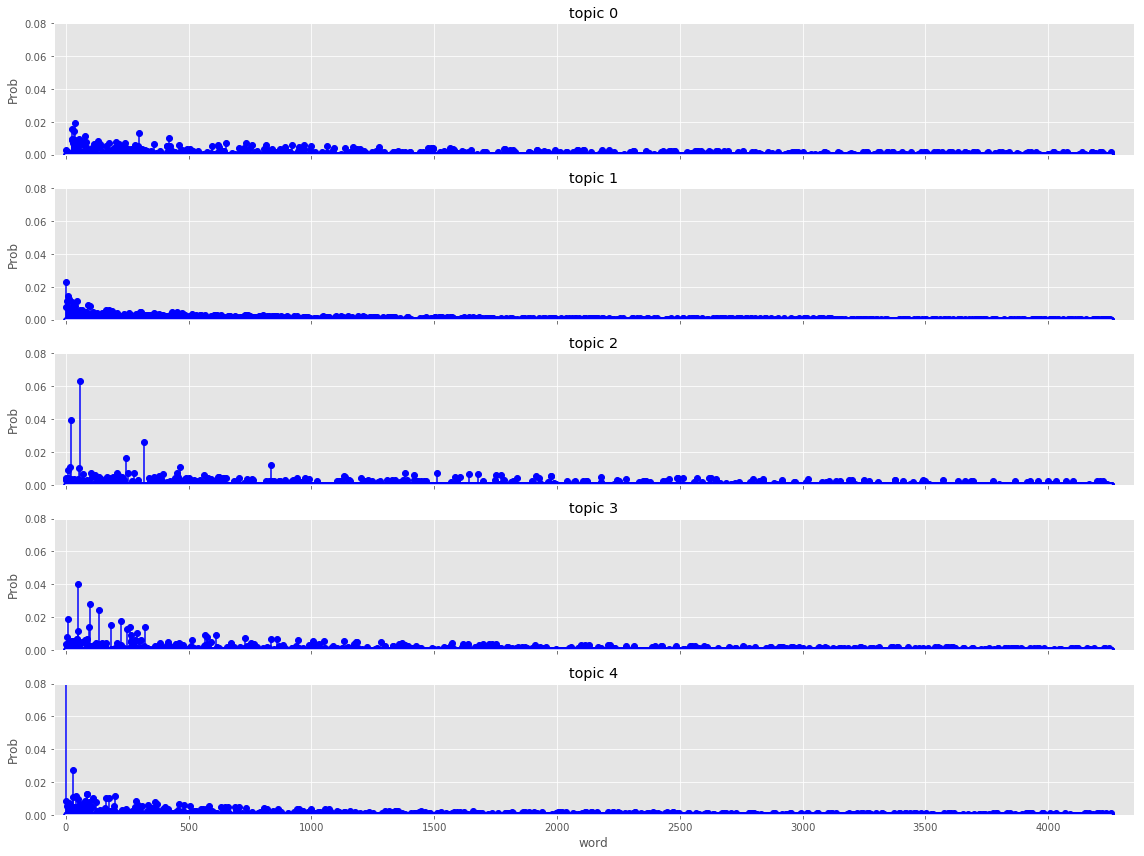

In [134]:
# Visualise the topic-word distributions
# Each topic should have a distinct distribution of words
# In the stem plots below, the height of each stem reflects the probability of the word in the focus topic:

f, ax= plt.subplots(5, 1, figsize=(16, 12), sharex=True)
for i, k in enumerate([0, 1, 2, 3, 4]):
    ax[i].stem(topic_word[k,:], linefmt='b-',
               markerfmt='bo', basefmt='w-')
    ax[i].set_xlim(-50,4350)
    ax[i].set_ylim(0, 0.08)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("topic {}".format(k))

ax[4].set_xlabel("word")

plt.tight_layout()
plt.show()

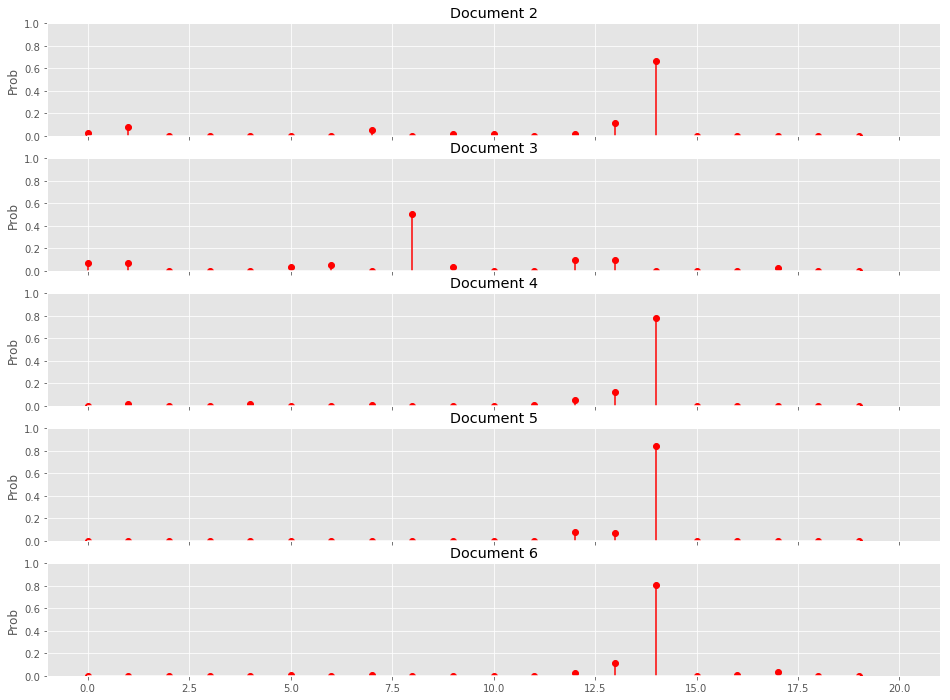

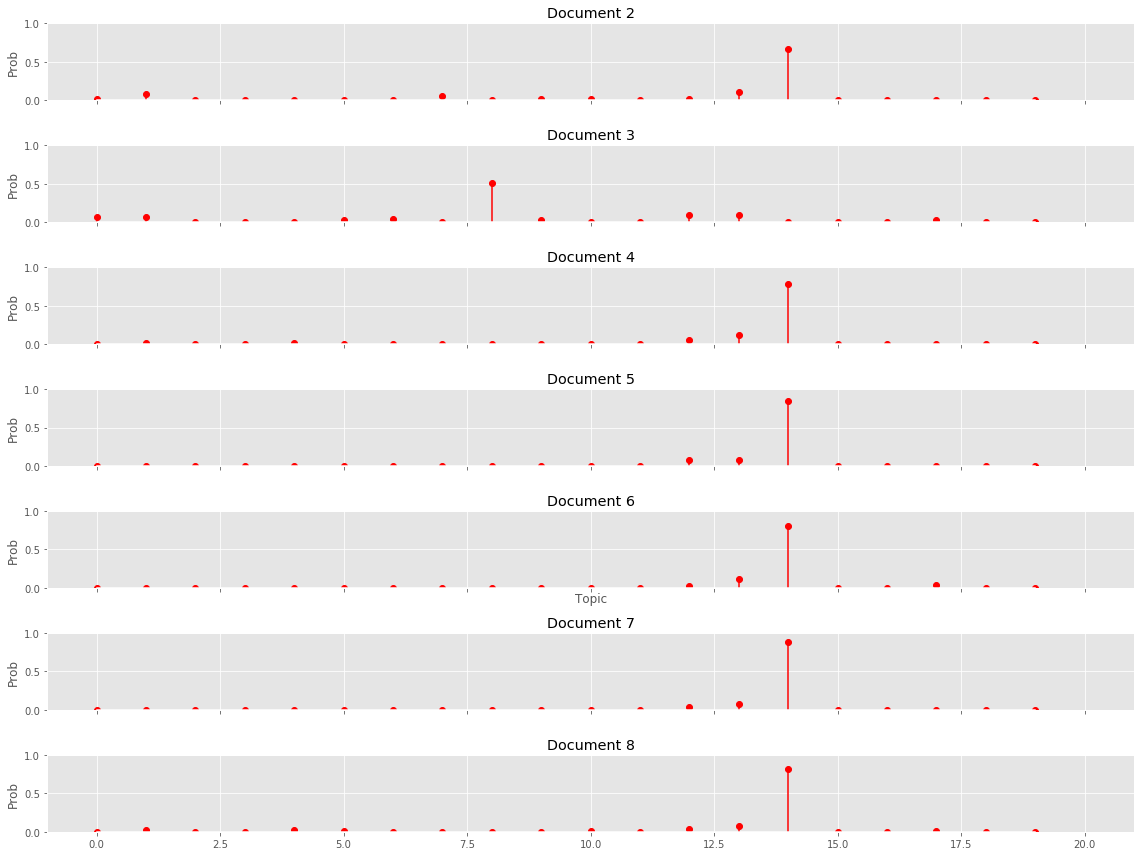

In [137]:
# Topic distribution: gives the probability of each of the 20 topics for every document.
# N.b. this shows that many documents have more than one topic with high probability (edge cases).
# So, choosing the topic with highest probability for each document can be subject to uncertainty
# May want to flag up ones that are eually likely to be on more than one topic?

f, ax= plt.subplots(7, 1, figsize=(16, 12), sharex=True)
for i, k in enumerate([2, 3, 4, 5, 6, 7, 8]):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-1, 21)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("Document {}".format(k))

ax[4].set_xlabel("Topic")

plt.tight_layout()
plt.show()

## Scrap code

In [100]:
print(ldamodel.print_topics(num_topics=5, num_words=5))

INFO:gensim.models.ldamodel:topic #0 (0.333): 0.099*"sugar" + 0.040*"suggest" + 0.040*"increased" + 0.040*"cause" + 0.040*"doctor"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.057*"sister" + 0.057*"father" + 0.056*"pressure" + 0.056*"never" + 0.056*"feel"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.065*"sister" + 0.065*"father" + 0.065*"driving" + 0.064*"practice" + 0.064*"dance"


[(0, '0.099*"sugar" + 0.040*"suggest" + 0.040*"increased" + 0.040*"cause" + 0.040*"doctor"'), (1, '0.057*"sister" + 0.057*"father" + 0.056*"pressure" + 0.056*"never" + 0.056*"feel"'), (2, '0.065*"sister" + 0.065*"father" + 0.065*"driving" + 0.064*"practice" + 0.064*"dance"')]


In [44]:
dt_array.shape

(5, 35)

In [45]:
type(dt_array)

numpy.ndarray

In [55]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [56]:
print(dictionary)

Dictionary(35 unique tokens: ['sugar', 'bad', 'consume', 'sister', 'like']...)


In [57]:
dictionary

In [30]:
tuple(dictionary.values())

('sugar',
 'bad',
 'consume',
 'sister',
 'like',
 'father',
 'spends',
 'lot',
 'time',
 'driving',
 'around',
 'dance',
 'practice',
 'doctor',
 'suggest',
 'may',
 'cause',
 'increased',
 'stress',
 'blood',
 'pressure',
 'sometimes',
 'feel',
 'perform',
 'well',
 'school',
 'never',
 'seems',
 'drive',
 'better',
 'health',
 'expert',
 'say',
 'good',
 'lifestyle')

In [29]:
vocab

('church',
 'pope',
 'years',
 'people',
 'mother',
 'last',
 'told',
 'first',
 'world',
 'year',
 'president',
 'teresa',
 'charles',
 'catholic',
 'during',
 'life',
 'u.s',
 'city',
 'public',
 'time',
 'since',
 'family',
 'king',
 'former',
 'british',
 'harriman',
 'against',
 'country',
 'vatican',
 'made',
 'three',
 'hospital',
 'minister',
 'home',
 'died',
 'tuesday',
 'government',
 "n't",
 'million',
 'prince',
 'john',
 'very',
 'war',
 'say',
 'order',
 'day',
 'political',
 'leader',
 'heart',
 'roman',
 'yeltsin',
 'later',
 'france',
 'party',
 'monday',
 'death',
 'clinton',
 'sunday',
 'elvis',
 'state',
 'diana',
 'royal',
 'wednesday',
 'churchill',
 'official',
 'service',
 'including',
 'film',
 'while',
 'week',
 'left',
 'work',
 'paris',
 'around',
 'american',
 'saying',
 'take',
 'doctors',
 'group',
 'son',
 'queen',
 'house',
 'police',
 'national',
 'under',
 'surgery',
 'next',
 'peace',
 'paul',
 'long',
 'ceremony',
 'month',
 'thursday',
 'french',
